# MACHINE LEARNING ADVANCED MDS19 UDD


## Desafío 1: Modelo de Predicción de Churn






#### Profesor      : Francisco Altimiras.
#### Alumnos      : Roy Barrera, José Pérez.


### Objetivo

Implementar un modelo de predicción de Churn utilizando datos de una empresa de telecomunicaciones. 

Basados en el data set del mes de Julio, se debe generar un modelo propio que ayude en la identificación de los clientes que dejarán la empresa el mes de Agosto. 


### Resumen

Para cumplir con el desafío planteado, en primera instancia se investiga en sitios web afines con el análisis de datos en busca de trabajos de similares características. De tal manera, en el sitio www.kaggle.com se logra localizar un trabajo, que será usado como base y guía para enfrentar este desafío. [https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction]

A modo de resumen, el desarrollo de este desafío consta de 4 grandes etapas:

1) __Exploración y manipulación del DataSet__: En esta etapa se revisa el dataset, en la búsqueda de algunos insight, y con ello se realiza la manipulación de la data para que pueda ser correctamente usada en el entrenamiento de un conjunto de modelos predictivos del Churn.

2) __Modelamiento__: En este item se abordan distintos modelos para la predicción del Churn. Los modelos implementados constituyen una primera aproximación para enfrentar el desafío propuesto. La intención es entregar un grupo de modelos de predicción del Churn, a partir del cuál se pueda realizar una profundización en mayor detalle en trabajos posteriores.

3) __Rendimiento de los modelos__: Aquí se revisa la performance de los modelos implementados, comparando sus métricas, matrices de correlación, curvas de ROC y curvas de precisión Re-Call. Todo esto para tener una idea de cuáles son los mejores modelos implementados.

4) __Conclusión__: Se entrega una breve conclusión a partir de los puntos abordados y el objetivo que se quiere lograr.


# <a> ÍNDICE</a>

- <a href='#1'>1. Exploración y manipulación del DataSet</a>
    - <a href='#1.1'>1.1. Filtrado de muestras</a>
    - <a href='#1.2'>1.2. Limpieza del DataSet</a>
    - <a href='#1.3'>1.3. Matriz de Correlación</a>
    - <a href='#1.4'>1.4. Pre-procesado del dataset</a>
- <a href='#2'>2. Modelamiento</a>
    - <a href='#2.1'>2.1. Regresión Logística (Línea Base)</a>
    - <a href='#2.2'>2.2. Regresión Logistica usando SMOTE</a>
    - <a href='#2.3'>2.3. Regresión Logística usando RFE(Eliminación Recursiva de Variables)</a>
    - <a href='#2.4'>2.4. Selección Univariada</a>
    - <a href='#2.5'>2.5. Visualización del Arbol de Decisiones</a>
    - <a href='#2.6'>2.6. Algoritmo KNN</a>
    - <a href='#2.7'>2.7. Clasificador Random Forest</a>
    - <a href='#2.8'>2.8. Gaussian Naive Bayes</a>
    - <a href='#2.9'>2.9. LightGBMClassifier</a>
    - <a href='#2.10'>2.10. XGBClassifier</a>
    - <a href='#2.11'>2.11. BalancedBaggingClassifier</a>
- <a href='#3'>3. Rendimiento de los modelos</a>
    - <a href='#3.1'>3.1. Comparación de Métricas</a>
    - <a href='#3.2'>3.2. Matrices de Confusión para los Modelos</a>
    - <a href='#3.3'>3.3. Curvas de ROC para los Modelos</a>
    - <a href='#3.4'>3.4. Curvas de Precisión-Recall</a>
- <a href='#4'>4. Conclusión</a>    

# <a id='1'>1. Exploración y manipulación del DataSet</a>

A continuación se inicia el desarrollo de este desafío, mediante la lectura del dataset para su exploración. 

In [1]:
# Se importa la libreria pandas
import pandas as pd

In [2]:
# Se lee el dataset dataset_churn.csv
df=pd.read_csv('dataset_churn.csv', sep=',')

In [3]:
# Se miran las primeras filas del dataset (inspección visual de la data cargada)
df.head()

cantidad_lineas customer_sub_type_desc product_classification_desc  \
0                1        Persona Natural    Multimedia Voz Ilimitado   
1                2        Persona Natural    Multimedia Voz Ilimitado   
2                2        Persona Natural    Multimedia Voz Ilimitado   
3                1        Persona Natural    Multimedia Voz Ilimitado   
4                1        Persona Natural    Multimedia Voz Ilimitado   

   billing_offer_id    billing_offer_desc         tipo_plan tipo_contrato  \
0           3301161  Multimedia L cod_709  Postpaid Payment    Con Equipo   
1           3301441  Multimedia L cod_739  Postpaid Payment  Habilitación   
2           3301151  Multimedia M cod_708  Postpaid Payment    Con Equipo   
3           3450316  Multimedia L cod_952  Postpaid Payment  Habilitación   
4           3301151  Multimedia M cod_708  Postpaid Payment    Con Equipo   

   cuotas_pendientes procedencia_equipo  cuota_voice  ...  antiguedad_plan_up  \
0                 14          Concesión       1667.0  ...                   2   
1                  0    Propio personal       1667.0  ...                   3   
2                 16          Concesión       1667.0  ...                   0   
3                  0    Propio personal       1667.0  ...                   3   
4                  7          Concesión       1667.0  ...                   9   

  sobreconsumo_gb  flag_ing3_min_dudoso  flag_ing3_max_dudoso  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   

   flag_cf_erroneo  flag_cliente_salta  flag_plan_salta  flag_sin_ingreso  \
0                0                   0                0                 0   
1                0                   0                0                 0   
2                0                   0                0                 0   
3                0                   0                0                 0   
4                0                   0                0                 0   

   flag_sin_talla  flag_talla_prep  
0               0                0  
1               0                0  
2               0                0  
3               0                0  
4               0                0  

[5 rows x 84 columns]

__El dataset tiene 84 variables. Pero en la planilla "Diccionario Campos Bloques.xlsx", son descritas solo 81 variables, ¿A que se debe esta diferencia?__

Al comparar las variables del dataset contra las variables descritas en el "Diccionario Campos Bloques.xlsx" se tiene que:

a) Las variables __cargo_fijo_plan__, __close_date__ y __comuna__ están en el dataset y no vienen en el "Diccionario Campos Bloques.xlsx"

b) Las variables __antigüedad_plan_up__, __2g_data_gb__, __3g_data_gb__ y __4g_data_gb__ descritas en el "Diccionario Campos Bloques.xlsx", aparecen en el dataset aparecen como __antiguedad_plan_up__, __X2g_data_gb__, __X3g_data_gb__ y __X4g_data_gb__ respectivamente.

Ya resuelta la interrogante planteada con las 2 respuestas logradas, se continua con la revisión del dataset. 

Más adelante se tendrán las consideraciones pertinentes conforme los puntos a) y b)

In [4]:
# Se revisan algunos descritores estadisticos del dataset.
df.describe()

cantidad_lineas  billing_offer_id  cuotas_pendientes   cuota_voice  \
count     93366.000000      9.336600e+04       93366.000000  93366.000000   
mean          1.338881      2.813748e+06           2.657252    976.459171   
std           0.775114      7.827318e+05           4.837565    605.329076   
min           1.000000      1.952500e+04           0.000000      0.000000   
25%           1.000000      1.964683e+06           0.000000    350.000000   
50%           1.000000      3.301191e+06           0.000000    700.000000   
75%           1.000000      3.509641e+06           3.000000   1667.000000   
max          25.000000      3.575909e+06          22.000000   6000.000000   

           cuota_gb  cargo_fijo_plan  antiguedad_subscriptor  \
count  93366.000000     93366.000000            93366.000000   
mean    2130.387164     15554.539672               31.584378   
std    13502.445118      6794.157153               43.536266   
min        0.000000    -26985.000000                0.000000   
25%       15.000000      9990.000000                6.000000   
50%       25.000000     14990.000000               15.000000   
75%       40.000000     19990.000000               37.000000   
max    88888.000000     68250.000000              350.000000   

       antiguedad_equipo  antiguedad_plan  ciclo_facturacion  ...  \
count       93366.000000     93366.000000       93366.000000  ...   
mean           25.956344        35.576773          12.129555  ...   
std            39.861282        44.757122           7.194706  ...   
min           -12.000000         0.000000           1.000000  ...   
25%             0.000000         8.000000           1.000000  ...   
50%            11.000000        19.000000          12.000000  ...   
75%            29.000000        42.000000          19.000000  ...   
max           195.000000       350.000000          19.000000  ...   

       antiguedad_plan_up  sobreconsumo_gb  flag_ing3_min_dudoso  \
count        93366.000000     93366.000000          93366.000000   
mean            34.223636         0.104117              0.026519   
std             44.734793         0.305414              0.160674   
min              0.000000         0.000000              0.000000   
25%              6.000000         0.000000              0.000000   
50%             18.000000         0.000000              0.000000   
75%             41.000000         0.000000              0.000000   
max            350.000000         1.000000              1.000000   

       flag_ing3_max_dudoso  flag_cf_erroneo  flag_cliente_salta  \
count          93366.000000     93366.000000        93366.000000   
mean               0.000032         0.002442            0.079162   
std                0.005668         0.049357            0.269992   
min                0.000000         0.000000            0.000000   
25%                0.000000         0.000000            0.000000   
50%                0.000000         0.000000            0.000000   
75%                0.000000         0.000000            0.000000   
max                1.000000         1.000000            1.000000   

       flag_plan_salta  flag_sin_ingreso  flag_sin_talla  flag_talla_prep  
count     93366.000000      93366.000000    93366.000000          93366.0  
mean          0.001253          0.035688        0.003974              0.0  
std           0.035378          0.185511        0.062912              0.0  
min           0.000000          0.000000        0.000000              0.0  
25%           0.000000          0.000000        0.000000              0.0  
50%           0.000000          0.000000        0.000000              0.0  
75%           0.000000          0.000000        0.000000              0.0  
max           1.000000          1.000000        1.000000              0.0  

[8 rows x 68 columns]

__Se ve que el dataset tiene 93.366 muestras.__


## <a id='1.1'>1.1. Filtrado de muestras</a>

Como parte del desafío se indica que se deben filtrar (eliminar) para el propósito "Predicción del Churn" todas las muestras que cumplan con:

1.  Clientes registrados con estado de subscriptor como ALTAS NUEVAS
2.  Clientes morosos
3.  Empleados
4.  Clientes con plan mandato
5.  Clientes multi_ingreso
6.  Clientes con ing3_min_dudoso
7.  Clientes con ing3_max_dudoso
8.  Clientes con cf_erroneo
9.  Clientes sin_ingreso
10. Clientes sin_talla
11. Clientes talla_prep
12. Clientes registrados como PREMATUROS 


Se procede a filtrar las muestras, según lo mencionado anteriormente.

In [5]:
# Se aplica filtrado de muestras del dataset. 

# De ahora en adelante llamaremos df_01, al dataframe filtrado, con el total de muestras a ser usadas para el modelado.
# ¡¡ IMPORTANTE !! Aún esta pendiente la etapa de selección de variables.

df_01 = df[((df['estado_subscriptor']    != 'ALTA_NUEVA') & # Condición 01.
           (df['flag_moroso']            ==            0) & # Condición 02.
           (df['flag_empleado']          ==            0) & # Condición 03.
           (df['flag_mandato']           ==            0) & # Condición 04.
           (df['flag_multi_ingreso']     ==            0) & # Condición 05.
           (df['flag_ing3_min_dudoso']   ==            0) & # Condición 06.
           (df['flag_ing3_max_dudoso']   ==            0) & # Condición 07.
           (df['flag_cf_erroneo']        ==            0) & # Condición 08.
           (df['flag_sin_ingreso']       ==            0) & # Condición 09.
           (df['flag_sin_talla']         ==            0) & # Condición 10.
           (df['flag_talla_prep']        ==            0) & # Condición 11.
           (df['estado_subscriptor']     !=  'PREMATURO'))] # Condición 12.
df_01 = df_01.reset_index()[df_01.columns]

# Se obtiene una visión general del dataset df_01
print ("# Muestras       : {:>7}".format(df_01.shape[0]))
print ("# Variables      : {:>7}".format(df_01.shape[1]), "\n")
print ("Variables        : \n" ,df_01.columns.tolist())
print ("\n# Muestras  con  nulos    : {:>6}".format(df_01.isnull().sum().values.sum()))
print ("\nValores únicos x variable :  ")
print(df_01.nunique())


# Muestras       :   51536
# Variables      :      84 

Variables        : 
 ['cantidad_lineas', 'customer_sub_type_desc', 'product_classification_desc', 'billing_offer_id', 'billing_offer_desc', 'tipo_plan', 'tipo_contrato', 'cuotas_pendientes', 'procedencia_equipo', 'cuota_voice', 'cuota_gb', 'talla_plan', 'cargo_fijo_plan', 'antiguedad_subscriptor', 'antiguedad_equipo', 'antiguedad_plan', 'ciclo_facturacion', 'flag_empleado', 'flag_mandato', 'flag_mvone', 'X4g_data_gb', 'X3g_data_gb', 'X2g_data_gb', 'porc_uso_4g', 'porc_uso_3g', 'porc_uso_2g', 'total_consumo_gb', 'cei_percentil_25', 'cei_percentil_75', 'discount_fixed_charge', 'turbo_charge', 'other_consumption', 'ing3_c_iva', 'total_charge', 'recharge_avg', 'dias_moroso', 'rec_tecnicos', 'rec_comerciales', 'flag_baja', 'cant_intenciones', 'flag_contenido', 'flag_cambio_plan', 'delta_arpu', 'tipo_cambio_plan', 'cant_cambio_plan', 'modalidad_cambio', 'cc_blindaje', 'cc_venta', 'cc_postventa', 'cc_informativo', 'total_campanas', 'flag

__Nota 1 :__ Observamos que aquellas variables con un único valor, no aportan valor al análisis, es decir no tienen relevancia de cara al entrenamiento del modelo predictivo del Churn.


## <a id='1.2'>1.2. Limpieza del DataSet</a>

A continuación se realiza la limpieza del dataset para asegurar que las variables y sus muestras, son las adecuadas para el posterior modelado predictivo del Churn.

In [6]:
# Se identifican todas las variables del dataset df_01, con un único valor para todas sus muestras.

for var in df_01.nunique()[df_01.nunique()==1].index.tolist():
    print('{:<25}'.format(var), '{:>10}'.format(pd.unique(df_01[var]).tolist()[0]))


flag_empleado                      0
flag_mandato                       0
discount_fixed_charge              0
cc_postventa                       0
flag_bicicletero_port              0
flag_multi_ingreso                 0
close_date                   2019-07
flag_moroso                        0
estado_subscriptor            MADURO
flag_ing3_min_dudoso               0
flag_ing3_max_dudoso               0
flag_cf_erroneo                    0
flag_cliente_salta                 0
flag_sin_ingreso                   0
flag_sin_talla                     0
flag_talla_prep                    0


__Nota 2 :__ En efecto estas variables no son relevantes para el modelo predictivo del Churn, motivo por el cual no serán consideradas como parte de las variables predictoras.

In [7]:
# Se eliminan las variables con valor único para todas sus muestras. 
# En adelante llamaremos df_02 al dataframe en donde se han eliminado estas variables.

df_02 = df_01.drop(df_01.nunique()[df_01.nunique()==1].index.tolist(), axis = 1)
df_02.head()

cantidad_lineas customer_sub_type_desc product_classification_desc  \
0                1        Persona Natural    Multimedia Voz Ilimitado   
1                1        Persona Natural                  MULTIMEDIA   
2                2        Persona Natural                  MULTIMEDIA   
3                2        Persona Natural                  MULTIMEDIA   
4                1        Persona Natural                  MULTIMEDIA   

   billing_offer_id      billing_offer_desc         tipo_plan tipo_contrato  \
0           3301171   Multimedia XL cod_710  Postpaid Payment  Movistar One   
1           3551201     Full Control XS 852    Hybrid Payment  Habilitación   
2           3301741       Control S cod_702    Hybrid Payment    Con Equipo   
3           3302101  Full Control S cod_799    Hybrid Payment    Con Equipo   
4           1964693      Control XS cod_JMK    Hybrid Payment    Con Equipo   

   cuotas_pendientes procedencia_equipo  cuota_voice  ...  max_porc_out_call  \
0                  3          Concesión       1667.0  ...              0.375   
1                  0    Propio personal        350.0  ...              0.757   
2                  4          Concesión        700.0  ...              0.500   
3                  0          Concesión        700.0  ...              0.500   
4                  0          Concesión        350.0  ...              0.368   

  out_empresa  cant_portabilidades  flag_salta  migracion_salta  \
0       ENTEL                    0         0.0              0.0   
1       ENTEL                    0         0.0              0.0   
2       CLARO                    0         0.0              0.0   
3        OTRA                    0         0.0              0.0   
4         WOM                    0         0.0              0.0   

   flag_baja_plus  flag_intencion_baja  antiguedad_plan_up  sobreconsumo_gb  \
0               1                    0                  13                0   
1               1                    0                  12                1   
2               1                    0                  12                1   
3               1                    0                   0                0   
4               1                    0                  26                0   

   flag_plan_salta  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 68 columns]

Como parte de la manipulación de las variables convertiremos las variables tipo Object a tipo Category, pensando en modelado posterior.

In [8]:
# Se identifican las variables tipo object
l_v_obj = []
l_v_obj = list(df_02.select_dtypes(['O']).columns)

# Conversión de variables tipo object a tipo category
df_02[l_v_obj] = df_02[l_v_obj].astype("category")

# Se reemplazan los textos de las variables categóricas, por su valor de categoría.
for var in l_v_obj:
    df_02[var]  = df_02[var].cat.codes

# Se inspeccionan los descriptores estadísticos de df_02
df_02.describe()

cantidad_lineas  customer_sub_type_desc  product_classification_desc  \
count     51536.000000            51536.000000                 51536.000000   
mean          1.313102                1.912876                     3.460843   
std           0.748282                0.290024                     1.058317   
min           1.000000                0.000000                     0.000000   
25%           1.000000                2.000000                     3.000000   
50%           1.000000                2.000000                     3.000000   
75%           1.000000                2.000000                     3.000000   
max          25.000000                3.000000                     6.000000   

       billing_offer_id  billing_offer_desc     tipo_plan  tipo_contrato  \
count      5.153600e+04        51536.000000  51536.000000   51536.000000   
mean       2.422437e+06           94.807009      0.467557       0.212065   
std        7.898120e+05           62.473671      0.498951       0.541036   
min        6.580300e+04            0.000000      0.000000       0.000000   
25%        1.696680e+06           41.000000      0.000000       0.000000   
50%        1.964693e+06           64.000000      0.000000       0.000000   
75%        3.301731e+06          169.000000      1.000000       0.000000   
max        3.551241e+06          221.000000      1.000000       2.000000   

       cuotas_pendientes  procedencia_equipo   cuota_voice  ...  \
count       51536.000000        51536.000000  51536.000000  ...   
mean            2.343236            0.086444   1036.538342  ...   
std             4.507548            0.281022    599.581885  ...   
min             0.000000            0.000000      0.000000  ...   
25%             0.000000            0.000000    350.000000  ...   
50%             0.000000            0.000000    700.000000  ...   
75%             2.000000            0.000000   1667.000000  ...   
max            22.000000            1.000000   2600.000000  ...   

       max_porc_out_call   out_empresa  cant_portabilidades    flag_salta  \
count       51536.000000  51536.000000         51536.000000  51536.000000   
mean            0.373867      1.446833             0.023731      0.008771   
std             0.179999      1.301314             0.152211      0.093241   
min             0.000000      0.000000             0.000000      0.000000   
25%             0.248000      1.000000             0.000000      0.000000   
50%             0.354000      1.000000             0.000000      0.000000   
75%             0.481000      2.000000             0.000000      0.000000   
max             1.000000      4.000000             1.000000      1.000000   

       migracion_salta  flag_baja_plus  flag_intencion_baja  \
count     51536.000000     51536.00000         51536.000000   
mean          0.550006         0.44563             0.002290   
std           2.718208         0.49704             0.047796   
min           0.000000         0.00000             0.000000   
25%           0.000000         0.00000             0.000000   
50%           0.000000         0.00000             0.000000   
75%           0.000000         1.00000             0.000000   
max          19.548387         1.00000             1.000000   

       antiguedad_plan_up  sobreconsumo_gb  flag_plan_salta  
count        51536.000000     51536.000000     51536.000000  
mean            50.960319         0.067215         0.001708  
std             49.943761         0.250397         0.041288  
min              0.000000         0.000000         0.000000  
25%             19.000000         0.000000         0.000000  
50%             32.000000         0.000000         0.000000  
75%             62.000000         0.000000         0.000000  
max            350.000000         1.000000         1.000000  

[8 rows x 68 columns]

Al revisar el dataset, se ve que hay 2 variables objetivo: __flag_baja__ y __flag_baja_plus__ .

__¿Cómo proceder en este caso?, ¿cuál de las 2 usar?, ¿usar ambas por separado?, ¿crear una nueva variable objetivo a partir de estas 2?__

Revisamos ambas variables objetivos en el datset para poder tomar una decisión.

In [9]:
# Se revisan las variables objetivo flag_baja y flag_baja_plus

print('{:<32}'.format('# de muestras:'), df_02.flag_baja.count())
print('{:<32}'.format('# bajas portabilidad:'),  df_02[df_02['flag_baja']==1]['flag_baja'].count())
print('{:<32}'.format('# bajas tentados:'), df_02[df_02['flag_baja_plus']==1]['flag_baja'].count())
print('{:<32}'.format('# bajas portabilidad y tentados:'),
      df_02[((df_02['flag_baja_plus']==1) & (df_02['flag_baja']==1))]['flag_baja'].count())


# de muestras:                   51536
# bajas portabilidad:            22960
# bajas tentados:                22966
# bajas portabilidad y tentados: 22960


Se observa que hay 22.960 muestras marcadas con "baja por portabilidad" (flag_baja) y "tentado" (flag_baja_plus) a la vez (intersección de ambos universos). 

Los 6 elementos distintos corresponderían clientes "tentados" pero que no realizaron "baja por portabilidad"

Por lo tanto, como ejercicio 1, consideramos para el dataset __df_03__, seguir solamenteb con la variable objetivo __flag_baja__ y eliminar la variable __flag_baja_plus__, ya que la primera contiene los valores de la segunda (los clientes de baja fueron tentados previamente)


In [10]:
# Entonces generamos el dataframe df_03, en donde se conserva la variable objetivo flag_baja

df_03 = df_02.drop('flag_baja_plus', axis = 1)

# Se muestra la correlación entre las variables del dataset.
df_03.corr()

cantidad_lineas  customer_sub_type_desc  \
cantidad_lineas                     1.000000               -0.123494   
customer_sub_type_desc             -0.123494                1.000000   
product_classification_desc         0.017418                0.008989   
billing_offer_id                    0.014401                0.065117   
billing_offer_desc                  0.050162               -0.058513   
tipo_plan                           0.057040               -0.066868   
tipo_contrato                      -0.023959                0.015850   
cuotas_pendientes                   0.027266                0.011194   
procedencia_equipo                 -0.072056                0.041934   
cuota_voice                         0.061977               -0.074825   
cuota_gb                            0.044240               -0.037743   
talla_plan                         -0.041876                0.065304   
cargo_fijo_plan                     0.075572               -0.069987   
antiguedad_subscriptor             -0.098602               -0.097919   
antiguedad_equipo                   0.005154               -0.015087   
antiguedad_plan                    -0.107602               -0.089054   
ciclo_facturacion                  -0.005998                0.047292   
flag_mvone                          0.015016               -0.006613   
X4g_data_gb                         0.044475                0.017358   
X3g_data_gb                        -0.014626                0.010955   
X2g_data_gb                        -0.003454               -0.001501   
porc_uso_4g                         0.052581                0.005326   
porc_uso_3g                        -0.049594                0.007188   
porc_uso_2g                        -0.009435               -0.003713   
total_consumo_gb                    0.035985                0.020070   
cei_percentil_25                    0.000353                0.003543   
cei_percentil_75                    0.014258                0.004987   
turbo_charge                       -0.000086               -0.000274   
other_consumption                   0.013736               -0.004148   
ing3_c_iva                          0.048920               -0.079773   
...                                      ...                     ...   
flag_contenido                      0.001609                0.009208   
flag_cambio_plan                    0.000260                0.019721   
delta_arpu                          0.020926                0.002338   
tipo_cambio_plan                    0.006023                0.018912   
cant_cambio_plan                   -0.001269                0.019620   
modalidad_cambio                    0.000892                0.020642   
cc_blindaje                         0.283120                0.122825   
cc_venta                           -0.018578                0.000649   
cc_informativo                      0.026066                0.237758   
total_campanas                      0.104998                0.207855   
flag_campanas                       0.020942                0.202787   
ind_portabilidad                    0.022422                0.032436   
empresa_anterior                    0.022204                0.029345   
comuna                             -0.026862                0.011158   
region                             -0.033023               -0.044069   
cant_tvoz                          -0.007852                0.006299   
flag_tentado_voz                   -0.016453                0.005290   
porc_in_call_movistar               0.181965               -0.039395   
max_porc_in_call                   -0.150578                0.044802   
in_empresa                         -0.001039                0.013404   
porc_out_call_movistar              0.162237               -0.035659   
max_porc_out_call                  -0.142476                0.046720   
out_empresa                         0.007431                0.014153   
cant_portabilidades                 0.025739                0.022660 

## <a id='1.3'>1.3. Matriz de Correlación</a>

A continuación se realiza un mapa de calor, que representa la Matriz de Correlación del dataset __df_03__.

In [11]:
#pip install plotly --upgrade

In [12]:
# Mariz de correlación del dataset df_03 

# Se importan librerías a ser usadas.
import numpy as np 

import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

import itertools

import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

correlation = df_03.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Coficiente Pearson de Correlacion",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Matriz de correlación de variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

C:\Users\rabarrera\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



__Hasta ahora se ha realizado el análisis exploratorio y limpieza del dataset original. <br>A continuación se realiza un pre-procesamiento del dataset limpio (df_03) para el posterior modelamiento predictivo del Churn__


## <a id='1.4'>1.4. Pre-procesado del dataset</a>

Realizamos ahora el pre-procesado del dataset, que consideran la separación de las variables descriptoras, objetivo y además escalamiento de variables numéricas, entre otras actividades.

In [13]:
# Pre-procesado del dataset

# Se importan las librerias a ser usadas.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Variable identificadora del cliente.
Id_col     = ['subscriber_key']
# Variable objetivo
target_col = ["flag_baja"]
# Variables categoricas
cat_cols   = df_03.nunique()[df_03.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
# Variables numericas
num_cols   = [x for x in df_03.columns if x not in cat_cols + target_col + Id_col]
# Variables binarias
bin_cols   = df_03.nunique()[df_03.nunique() == 2].keys().tolist()
# Variables con más de 2 valores
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Se escalan las variables numericas
std = StandardScaler()
scaled = std.fit_transform(df_03[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

# Se reemplazan las variables numericas escaladas.
df_03_og = df_03.copy()
df_03 = df_03.drop(columns = num_cols,axis = 1)
df_03 = df_03.merge(scaled,left_index=True,right_index=True,how = "left")


__Ya con el dataset preprocesado, se realiza un primer modelamiento para la predicción del churn, que será la línea base, para próximos modelamientos predictivos. Para establecer esta línea base, usaremos una Regresión Logística__

# <a id='2'>2. Modelamiento</a>

## <a id='2.1'>2.1. Regresión Logística (Línea Base)</a>

El primer modelo usado es una Regresión Logística, con el dataset tal cual, es decir sin apicar balanceo. Considerar que el desbalanceo del dataset para la clase Churn es de un 10.95% aproximadamente. En donde las muestras No Churn son el 55.45% y las muestras con Churn son el 44.55%.

In [14]:
#pip install yellowbrick

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      7111
           1       0.69      0.50      0.58      5773

    accuracy                           0.68     12884
   macro avg       0.68      0.66      0.66     12884
weighted avg       0.68      0.68      0.67     12884

Accuracy   Score :  0.6766532132877988
Area under curve :  0.6596996726307003 



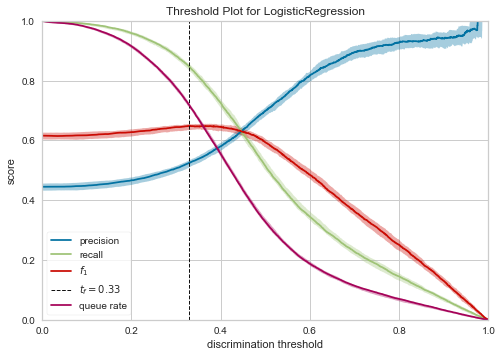

In [15]:
# Linea base del modelamiento  predicctivo del Churn, usando Regresión Logística.

# Se importan las librerias requeridas.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

# Se realiza la partición de los datos en entrenaiento y prueba.
train,test = train_test_split(df_03,test_size = .25 ,random_state = 111)
    
# Separación de variables predictoras y objetivo
cols    = [i for i in df_03.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

# Atributos de la función
# dataframe      - dataframe
# Algorithm      - Algoritmo a usar 
# training_x     - Variables predictoras entrenamiento
# testing_x      - Variables predictoras prueba
# training_y     - Variable objetivo entrenamiento
# training_y     - Variable objetivo prueba
# cf             - ["coefficientes","caracteristicas"](cooefficientes para la regresión logística
#                  caracteristicas para modelos basados en arboles.)
# threshold_plot - Sí es True retorna el gráfico del humbral para el modelo
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    # Modelo
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    # Coeficientes
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    # Matriz de confusion
    conf_matrix = confusion_matrix(testing_y,predictions)
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    # Grafica la matriz de confusion 
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    # Grafica la curva de ROC
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    # Grafica coeficientes
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    # Subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
       
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


## <a id='2.2'>2.2. Regresión Logística usando SMOTE</a>

Para el mismo modelo de Regresión Logística usado anteriormente, ahora se aplicará el concepto de balanceo de la data, usando para ello SMOTE: Synthetic Minority Oversampling Technique.

In [16]:
#pip install imblearn --user

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71      7111
           1       0.64      0.60      0.62      5773

    accuracy                           0.67     12884
   macro avg       0.66      0.66      0.66     12884
weighted avg       0.66      0.67      0.67     12884

Accuracy   Score :  0.666407947842285
Area under curve :  0.6597398657496237 



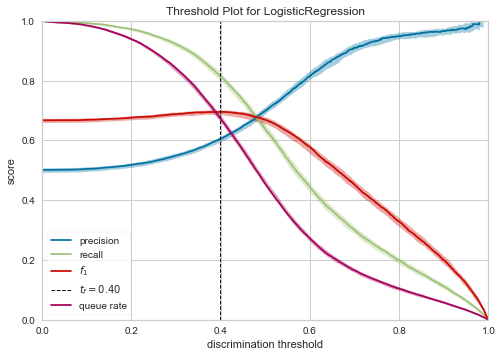

In [17]:
# Synthetic Minority Oversampling TEchnique (SMOTE)

# Es importada libreria requerida.
from imblearn.over_sampling import SMOTE

# Selección de variables predictoras a ser consideradas
cols    = [i for i in df_03.columns if i not in Id_col + target_col]

# Separación de variables predictoras de variable objetivo.
smote_X = df_03[cols]
smote_Y = df_03[target_col]

# Split de datos de entrenamiento y de prueba
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

# Oversampling de la clase minoritaría usando SMOTE
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)



# Instanciación de la Regresión Logística
logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Entrenamiento y evaluación del modelo predictivo.
telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


## <a id='2.3'>2.3. Regresión Logística usando RFE(Eliminación Recursiva de Variables)</a>

Volvemos a usar la Regresión Logística por tercera vez, y en este caso además del balanceo de la data que ya se realizó, se agrega la Eliminación Recursiva de Variables, para la elección de las "mejores" variables predictoras a ser usadas.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.73      0.71      7111
           1       0.64      0.59      0.61      5773

    accuracy                           0.66     12884
   macro avg       0.66      0.66      0.66     12884
weighted avg       0.66      0.66      0.66     12884

Accuracy   Score :  0.6644675566594226
Area under curve :  0.6571183121969087 



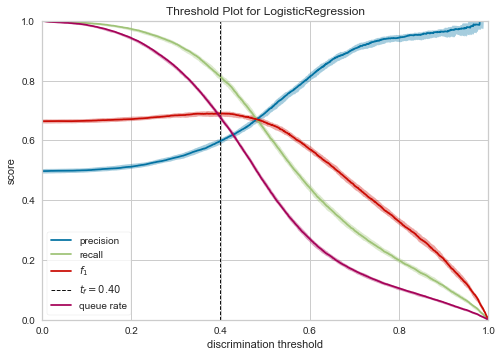

In [18]:
# Eliminación recursiva de variables

# Se importa la libreria requerida.
from sklearn.feature_selection import RFE

# Se instancia la Regresión Logistica.

logit = LogisticRegression()

#logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#          verbose=0, warm_start=False)

# Se instancia la eliminación recursiva de variables
rfe = RFE(logit,50)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

# Se identifican las variables a ser elimindas
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in df_03.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


# Separando data de entrenamiento y de prueba
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

## <a id='2.4'>2.4. Arbol de Decisiones</a>

El siguiente modelo que usaremos para este desafío es el Clasificador Arbol de Decisiones. En esta caso en particular, relizamos pruebas con el parámetro max_depth, logrando el mejor resultado("menos malo"), con el valor 12.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.72      0.70      7111
           1       0.62      0.57      0.60      5773

    accuracy                           0.65     12884
   macro avg       0.65      0.64      0.65     12884
weighted avg       0.65      0.65      0.65     12884

Accuracy   Score :  0.6525147469729897
Area under curve :  0.6448885204871514 



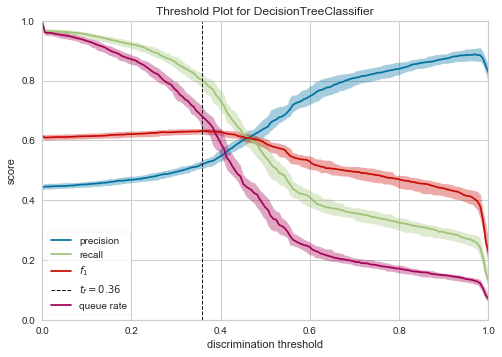

In [19]:
# Se importan las librerías requeridas.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Se instancia el modelo
decision_tree = DecisionTreeClassifier(max_depth = 12,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                       class_weight = 'balanced'
                                      )
features=[i for i in df_03.columns if i not in Id_col + target_col]

# Se entrena y evalua el modelo
telecom_churn_prediction(decision_tree,
                                 train_X,test_X,
                                 train_Y,test_Y,
                                 features,"features",threshold_plot = True)


## <a id='2.5'>2.5. Algoritmo KNN</a>

Continuando con el modelamiento predictivo del Churn, se usa el KNN ademas con SMOTE OverSample sobre la data.

In [20]:
# Uso del algoritmo KNN para hacer OverSample sobre la data.

# Se define la función telecom_churn_prediction_alg()
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    # Modelo
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    
    # Matriz de Confusión
    conf_matrix = confusion_matrix(testing_y,predictions)
    
    # ROC_AUC_SCORE
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    # Grafica de la curva de ROC
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    # Grafica de la matriz de confusion
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=6, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      7111
           1       0.55      0.45      0.50      5773

    accuracy                           0.59     12884
   macro avg       0.58      0.57      0.57     12884
weighted avg       0.58      0.59      0.58     12884

Accuracy Score   :  0.586541446755666
Area under curve :  0.5739751674244369


## <a id='2.6'>2.6. Clasificador Random Forest</a>

Aplicamos ahora el modelo Clasificador Random Forrest. En este caso se puede visualizar el clasificador Random Forest, seteando la variable plot_tree = True. Por lo pronto, se pone foco en lo que dice relación con su rendimiento, más que la visualización misma del árbol.

In [21]:
# Clasificador Random Forest

# Se importa la libreia requerida.
from sklearn.ensemble import RandomForestClassifier

#  Atributos de la funcion
# columns            - Variables usadas
# nf_estimators      - Numero de arboles del bosque.
# estimated_tree     - Numero de arboles a ser mostrado.
# maximum_depth      - Profundidad del arbol
# criterion_type     - split criterion type ["gini" or "entropy"]
# Model performance  - Muestra el rendimiento del modelo

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = True,
                           plot_tree = False) :
    
    dataframe = df_03_og[columns + target_col].copy()
    
    # Datos de entrenamiento y de prueba.
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    # Clasificador Random Forest
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    if plot_tree == True:
        graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                            rounded=True,proportion = False,
                                            feature_names = columns, 
                                            precision  = 2,
                                            class_names=["Not churn","Churn"],
                                            filled = True))
        display(graph)
    
    # Rendimiento del modelo
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_x,test_X[columns],
                                 rf_y,test_Y,
                                 columns,"features",threshold_plot = False)
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,120,99,30,"entropy",True)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.61      0.14      0.22      7111
           1       0.46      0.89      0.60      5773

    accuracy                           0.48     12884
   macro avg       0.53      0.52      0.41     12884
weighted avg       0.54      0.48      0.39     12884

Accuracy   Score :  0.47601676497981993
Area under curve :  0.5152742621316779 



## <a id='2.7'>2.7. Gaussian Naive Bayes</a>

Ahora corresponde el turno de usar Gaussian Naive Bayes para el modelamiento predictivo del Churn.

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       0.59      0.88      0.71      7111
           1       0.62      0.24      0.34      5773

    accuracy                           0.59     12884
   macro avg       0.60      0.56      0.52     12884
weighted avg       0.60      0.59      0.54     12884

Accuracy Score   :  0.5931387767773983
Area under curve :  0.5595649233725496


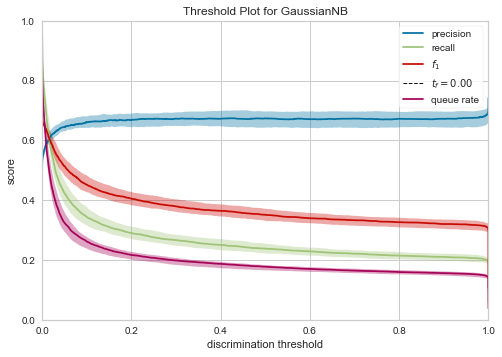

In [22]:
# Gaussian Naive Bayes

# Se importa la libreria a ser usada.
from sklearn.naive_bayes import GaussianNB
# Se instancia el modelo
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

## <a id='2.8'>2.8. LightGBMClassifier</a>

Se realiza ahora el modelamiento predictivo del Churn, usando LightGBMClassifier.

In [23]:
#pip install lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      7111
           1       0.70      0.58      0.64      5773

    accuracy                           0.70     12884
   macro avg       0.70      0.69      0.69     12884
weighted avg       0.70      0.70      0.70     12884

Accuracy   Score :  0.6997050605402049
Area under curve :  0.6888940176391278 



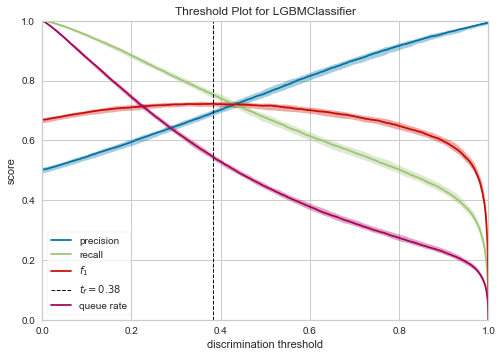

In [24]:
# LightGBMClassifie

# Se importa la libreria requerida
from lightgbm import LGBMClassifier

# Se instancia el modelo.
lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

cols = [i for i in df_03.columns if i not in Id_col + target_col]
telecom_churn_prediction(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"features",threshold_plot = True)


## <a id='2.9'>2.9. XGBClassifier</a>

El penúltimo modelo que aplicamos corresponda al XGBClassifier.

In [25]:
#pip install xgboost

In [26]:
# XGBClassifier
# Se importa la libreria a ser usada.
from xgboost import XGBClassifier


xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


cols = [i for i in df_03.columns if i not in Id_col + target_col]
telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"features",threshold_plot = False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

 Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      7111
           1       0.65      0.60      0.63      5773

    accuracy                           0.68     12884
   macro avg       0.68      0.67      0.67     12884
weighted avg       0.68      0.68 

## <a id='2.10'>2.10. BalancedBaggingClassifier</a>

Por último es usado BalancedBaggingClassifier, para el modelamiento predictivo del Churn.

In [27]:
# BalancedBaggingClassifier

#Se importa la libreria requerida 
from imblearn.ensemble import BalancedBaggingClassifier

# Se instancia el modelo
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
# Se entreha y evalua el modelo
telecom_churn_prediction_alg(bbc,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = False)



BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features=None,
                                                                max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                p

# <a id='3'>3. Rendimiento de los modelos</a>

En este punto se realiza la revisión del rendimiento de los modelos predictivos del Churn implementados. Esto considera la revisión los resultados de la métricas de cada unos los modelos, junto con su comparativa, para conocer cuales performan mejor("menos mal")

In [28]:
# Rendimiento de los  modelos

# Se importan las librerias requeridas
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Lleva el reporte de los modelos a un dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

# Salidas para cada uno de los modelos
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model9 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

model10 = model_report(bbc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Balanced Bagging Classifier")


# Junta todos los modelos
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [29]:
# Se mira directamente Dataframe que contiene el rendimiento de los modelos entrenados.
model_performances

Model  Accuracy_score  Recall_score  \
0  Logistic Regression(Baseline_model)        0.677197      0.497315   
1           Logistic Regression(SMOTE)        0.666408      0.595531   
2             Logistic Regression(RFE)        0.664468      0.586350   
3                        Decision Tree        0.670211      0.367920   
4                       KNN Classifier        0.586541      0.452971   
5             Random Forest Classifier        0.675955      0.409492   
6                          Naive Bayes        0.593139      0.236272   
7                      LGBM Classifier        0.699705      0.584791   
8                   XGBoost Classifier        0.679447      0.602113   
9          Balanced Bagging Classifier        0.683173      0.506496   

   Precision  f1_score  Area_under_curve  Kappa_metric  
0   0.695494  0.579941          0.660273      0.329377  
1   0.636549  0.615357          0.659740      0.321428  
2   0.636278  0.610295          0.657118      0.316574  
3   0.779736  0.499941          0.641772      0.298369  
4   0.546614  0.495406          0.573975      0.150374  
5   0.755272  0.531057          0.650886      0.315355  
6   0.620847  0.342284          0.559565      0.126502  
7   0.696370  0.635722          0.688894      0.383570  
8   0.654737  0.627324          0.672172      0.346967  
9   0.703392  0.588922          0.666551      0.342112

## <a id='3.1'>3.1. Comparación de Métricas</a>

Se efectúa la comparación de las métricas alcanzadas.

In [30]:
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


## <a id='3.2'>3.2. Matrices de Confusión para los Modelos</a>

Son visualizadas la Matrices de Confusión para los todos los modelos implementados.

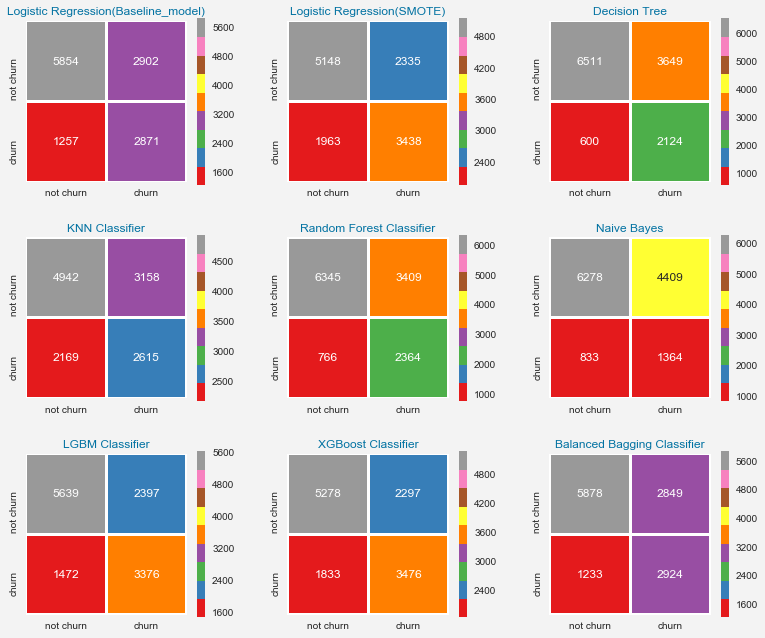

In [31]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,lgbm_c,xgc,bbc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',
          "Naive Bayes",'LGBM Classifier','XGBoost Classifier','Balanced Bagging Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='3.3'>3.3. Curvas de ROC para los Modelos</a>

Son visualizadas las Curvas de ROC para los modelos implementados.

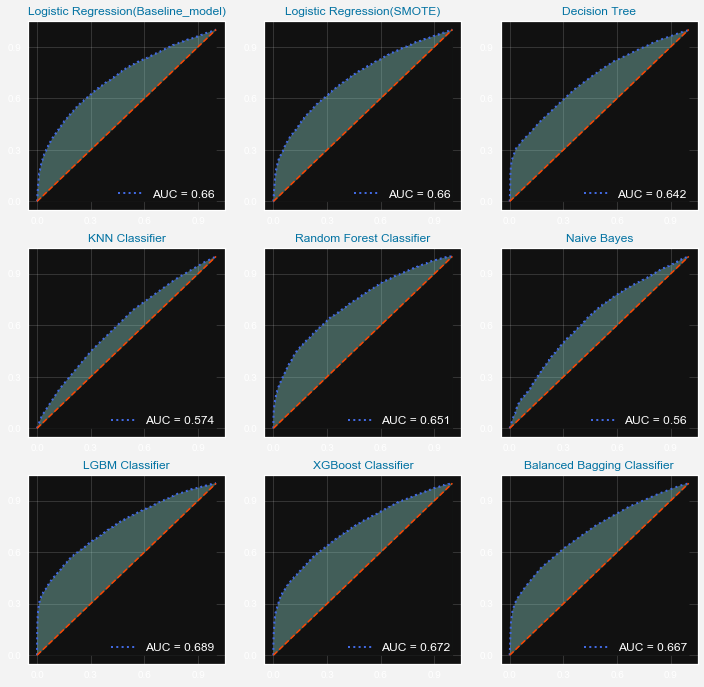

In [32]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,lgbm_c,xgc,bbc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',
          "Naive Bayes",'LGBM Classifier','XGBoost Classifier','Balanced Bagging Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## <a id='3.4'>3.4. Curvas de Precisión-Recall</a>

Se visualizan las Curvas de Precisón-Recall de los modelos predictivos del Churn implementados.

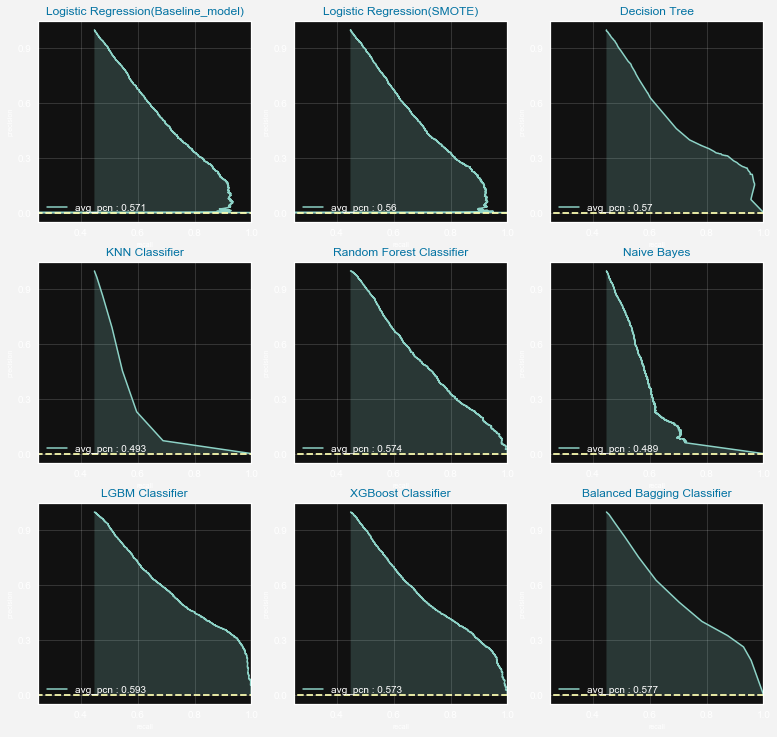

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,lgbm_c,xgc,bbc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',
          "Naive Bayes",'LGBM Classifier','XGBoost Classifier','Balanced Bagging Classifier']


fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

# <a id='4'>4. Conclusión</a>

A partir del desafío planteado, durante el desarrollo del mismo, se ve que si bien es cierto hay una variedad de modelos predictivos del Churn que pueden ser implementados, solo un grupo reducido tiene un comportamiento menos malo que el resto, en términos de su rendimiento.

Dado el desafío, hemos visto 2 ópticas de medir el rendimiento del modelo en cuestión.

La primera forma de medir el rendimiento es a nivel general del modelo mismo. Es decir, indicadores a nivel del modelo como se ven en el punto "3. Rendimiento de los modelos".

La segunda mirada para evaluar el desempeño del modelo, dice relación con el objetivo central del desafío, es decir, mide las métricas que dicen relación especifica con predecir correctamente la clase Clientes con Churn. 

Por ejemplo, podría ocurrir que el modelo en general tuviese un rendimiento aceptable, esto basado en que se lograse un muy buen rendimiento para predecir la clase Cliente No Churn y a la vez un mal rendimiento para la predicción de la clase Cliente con Churn. Es decir en promedio un rendimiento aceptable.

Si bien una primera aproximación es el rendimiento general del modelo, creemos valioso hacer foco en el rendimiento del modelo para predecir correctamente la clase Cliente Churn.

Como resultado de este desafío, se tiene que los modelos predictivos del Churn, considerando sus métricas generales de Accuracy_score, Recall_score, Precision, f1_score, Area_under_curve y Kappa_metric, van de menos a más malos son:

* LGBM Classifier
* XGBoost Classifier
* Balanced Bagging Classifier	
* Logistic Regression(Baseline_model)
* Logistic Regression(SMOTE)
* Logistic Regression(RFE)
* Random Forest Classifier
* Decision Tree	
* KNN Classifier
* Naive Bayes

En tanto que, si ahora nos focalizamos en la clase Cliente con Churn, los modelos que van de menos malos a más malos son:

* LGBM Classifier
* XGBoost Classifier
* Logistic Regression(SMOTE)
* Logistic Regression(RFE)
* Random Forest Classifier
* Decision Tree
* Balanced Bagging Classifier
* Logistic Regression(Baseline_model)
* KNN Classifier
* Naive Bayes

Vemos que los modelos LGBM Classifier, XGBoost Classifier cumplen con ser los "mejores"(menos malos) para ambas ópticas de rendimiento de los modelos.
     
A partir de lo anterior una propuesta es que ambos modelos LGBM Classifier, XGBoost Classifier, son candidatos a invertir tiempo en ellos, en busca de lograr una mejora para la predicción del Churn, conforme el dataset disponibilizado.

